In [3]:
#importing packages/Libraries
import pandas as pd
import numpy as np

In [4]:
#importing the dataset
dataset=pd.read_csv('/content/SMSSpamCollection',sep="\t",names=['labels','message'])

In [5]:
dataset

,labels,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
#checking if there is any null values
dataset.isnull().sum()

labels     0
message    0
dtype: int64

In [7]:
#checking the infomation of the data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   labels   5572 non-null   object
 1   message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [8]:
#describing the dataset
dataset.describe()

,labels,message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [9]:
#relabeling the data set inplace of ham and spam with 0 and 1
dataset['labels']=dataset['labels'].map({'ham':0,'spam':1})

In [10]:
dataset

,labels,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will ü b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0, 0.5, 'count ')

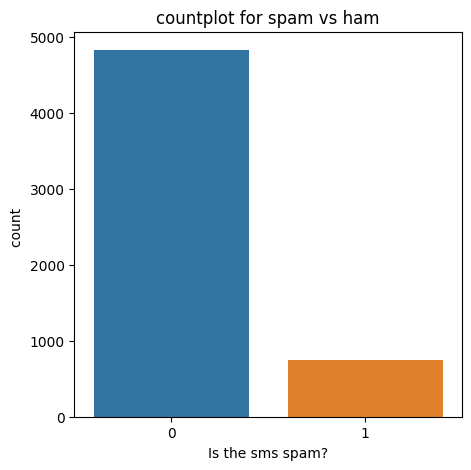

In [12]:
#count plot for spam and ham imbalance dataset
plt.figure(figsize=(5,5))
g=sns.countplot(x='labels',data=dataset)
plt.title("countplot for spam vs ham")
plt.xlabel("Is the sms spam?")
plt.ylabel("count ")

In [13]:
#handling imbalance dataset usnig oversampling
#importing only spam sms from the above dataset
only_spam=dataset[dataset["labels"]==1]

In [14]:
only_spam

,labels,message
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


In [15]:
print("no of spam mails",len(only_spam))
print("no of ham mails",len(dataset)-len(only_spam))

no of spam mails 747
no of ham mails 4825


In [16]:
count=int((dataset.shape[0]-only_spam.shape[0])/only_spam.shape[0])
count

6

In [17]:
for i in range(0,count-1):
    dataset=pd.concat([dataset,only_spam])

Text(0, 0.5, 'count ')

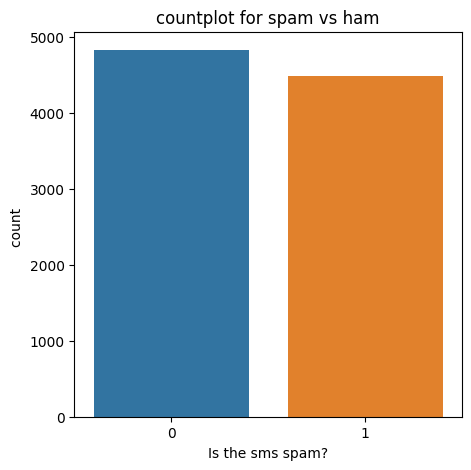

In [18]:
plt.figure(figsize=(5,5))
g=sns.countplot(x='labels',data=dataset)
plt.title("countplot for spam vs ham")
plt.xlabel("Is the sms spam?")
plt.ylabel("count ")

In [19]:
#creating word count
dataset['wordcount']=dataset['message'].apply(lambda x:len(x.split()))
dataset

,labels,message,wordcount
0,0,"Go until jurong point, crazy.. Available only ...",20
1,0,Ok lar... Joking wif u oni...,6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28
3,0,U dun say so early hor... U c already then say...,11
4,0,"Nah I don't think he goes to usf, he lives aro...",13
...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28


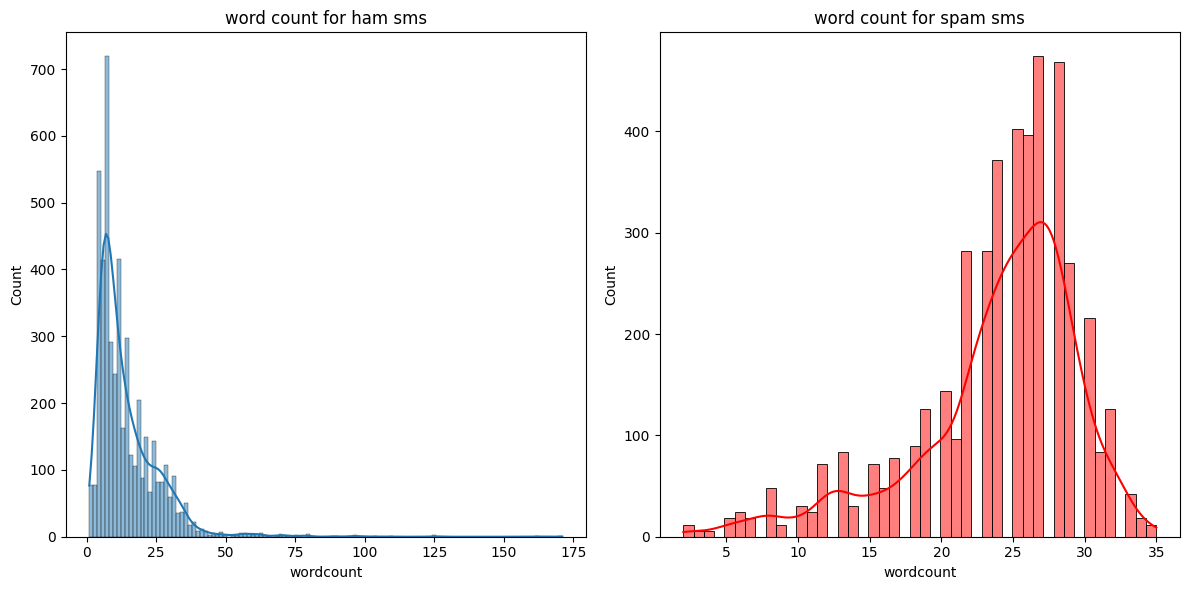

In [20]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
g=sns.histplot(dataset[dataset["labels"]==0].wordcount, kde=True)
plt.title("word count for ham sms")
plt.subplot(1,2,2)
g=sns.histplot(dataset[dataset["labels"]==1].wordcount, kde=True,color="red")
plt.title("word count for spam sms")
plt.tight_layout()
plt.show()

In [21]:
#creting new feature containing corrency symbol or not
def currency(data):
    currency_symbols=["$","€","£","฿","₹"]
    for i in currency_symbols:
        if i in data:
            return 1
    return 0

In [22]:
dataset["contains_currency_symbol"]=dataset["message"].apply(currency)

In [23]:
dataset

,labels,message,wordcount,contains_currency_symbol
0,0,"Go until jurong point, crazy.. Available only ...",20,0
1,0,Ok lar... Joking wif u oni...,6,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0
3,0,U dun say so early hor... U c already then say...,11,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0
...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0


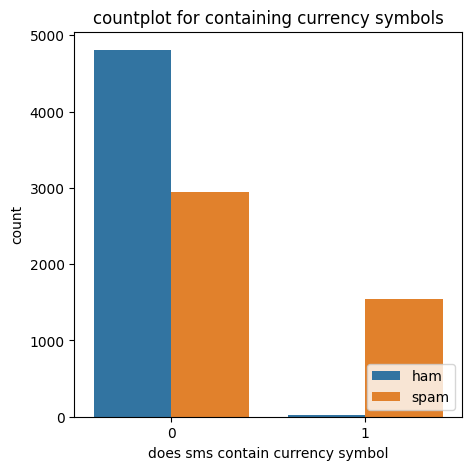

In [24]:
#creating count plot for currency symbols
plt.figure(figsize=(5,5))
g=sns.countplot(x='contains_currency_symbol',data=dataset,hue="labels")
plt.title("countplot for containing currency symbols")
plt.xlabel("does sms contain currency symbol")
plt.ylabel("count")
plt.legend(labels=["ham","spam"],loc=4)

In [25]:
#creating new feature of containing numbers
def number(data):
    for i in data:
        if ord(i)>=48 and ord(i)<=57:
            return 1
    return 0

In [26]:
dataset['contains_number']=dataset['message'].apply(number)

In [27]:
dataset

,labels,message,wordcount,contains_currency_symbol,contains_number
0,0,"Go until jurong point, crazy.. Available only ...",20,0,0
1,0,Ok lar... Joking wif u oni...,6,0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,28,0,1
3,0,U dun say so early hor... U c already then say...,11,0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",13,0,0
...,...,...,...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...,16,0,1
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...,33,1,1
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,28,0,1
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...,28,0,1


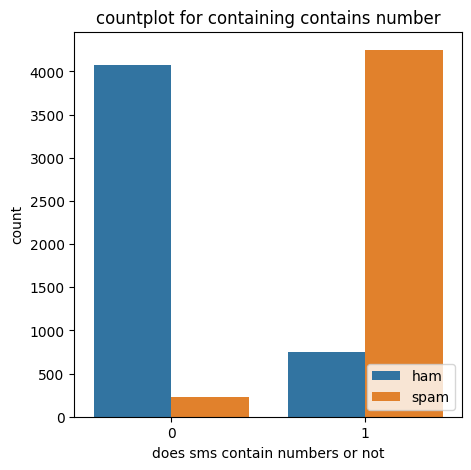

In [28]:
#count plot for containing numbers and letters
plt.figure(figsize=(5,5))
g=sns.countplot(x='contains_number',data=dataset,hue="labels")
plt.title("countplot for containing contains number")
plt.xlabel("does sms contain numbers or not")
plt.ylabel("count")
plt.legend(labels=["ham","spam"],loc=4)

In [29]:
#Data cleaning or data preprosessing
import nltk
import re
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [30]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

corpus = []
wnl = WordNetLemmatizer()

for sms in dataset.message:
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)  # Clean special characters in the message
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]  # Lemmatize the filtered words
    processed_message = ' '.join(lemm_words)

    corpus.append(processed_message)

In [31]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

In [32]:
#creating the bag of words model
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(max_features=500)
vectors = tfidf.fit_transform(corpus).toarray()
feature_names = tfidf.get_feature_names_out()


In [33]:
x=pd.DataFrame(vectors , columns=feature_names)
y=dataset['labels']

In [34]:
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.metrics import classification_report,confusion_matrix

In [35]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [36]:
x_test

,ac,access,account,address,admirer,age,already,also,always,amp,...,xxx,ya,yeah,year,yes,yesterday,yet,yo,yr,yup
1155,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.72412,0.0,0.0,0.0,0.0
1790,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.557154,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
3003,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
6489,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
592,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4147,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
274,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
1345,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0
8891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.00000,0.0,0.0,0.0,0.0


In [37]:
from sklearn.naive_bayes import MultinomialNB

In [39]:
mnb=MultinomialNB()
cv=cross_val_score(mnb,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.943
0.004


In [40]:
mnb.fit(x_train,y_train)
y_pred=mnb.predict(x_test)

In [41]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       959
           1       0.94      0.94      0.94       903

    accuracy                           0.94      1862
   macro avg       0.94      0.94      0.94      1862
weighted avg       0.94      0.94      0.94      1862



In [42]:
cm=confusion_matrix(y_test,y_pred)
cm

array([[905,  54],
       [ 56, 847]])

Text(33.22222222222222, 0.5, 'predicted values')

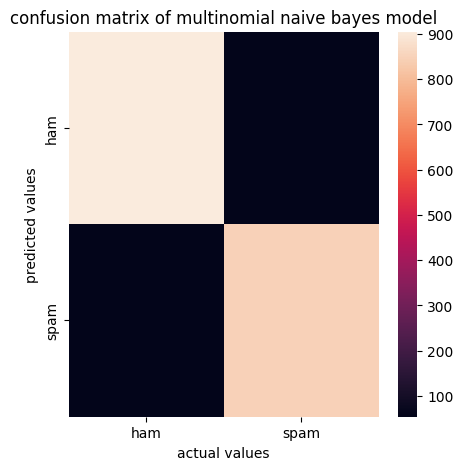

In [45]:
plt.figure(figsize=(5,5))
axis_labels=["ham","spam"]
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels)
p=plt.title("confusion matrix of multinomial naive bayes model")
plt.xlabel("actual values")
plt.ylabel("predicted values")

In [46]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
cv=cross_val_score(dt,x,y,scoring='f1',cv=10)
print(round(cv.mean(),3))
print(round(cv.std(),3))

0.98
0.005


In [47]:
dt.fit(x_train,y_train)
y_pred1=dt.predict(x_test)
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       959
           1       0.96      1.00      0.98       903

    accuracy                           0.98      1862
   macro avg       0.98      0.98      0.98      1862
weighted avg       0.98      0.98      0.98      1862



In [48]:
cm=confusion_matrix(y_test,y_pred1)
cm

array([[925,  34],
       [  4, 899]])

Text(33.22222222222222, 0.5, 'predicted values')

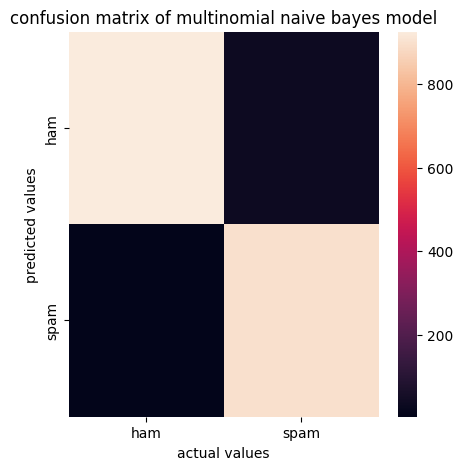

In [49]:
plt.figure(figsize=(5,5))
axis_labels=["ham","spam"]
g=sns.heatmap(data=cm,xticklabels=axis_labels,yticklabels=axis_labels)
p=plt.title("confusion matrix of multinomial naive bayes model")
plt.xlabel("actual values")
plt.ylabel("predicted values")

In [68]:
import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.externals import joblib  # or from joblib import load

# Import the trained model
dt = joblib.load("path_to_trained_model.pkl")  # or load("path_to_trained_model.joblib")

# Import the TF-IDF vectorizer
tfidf = TfidfVectorizer()  # Make sure to use the same parameters as during training

# Download the WordNet corpus for lemmatization
nltk.download('wordnet')

# Initialize the lemmatizer
wnl = WordNetLemmatizer()

def predict_spam(sms):
    message = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sms)  # Clean special characters in the message
    message = message.lower()
    words = message.split()
    filtered_words = [word for word in words if word not in set(stopwords.words('english'))]
    lemm_words = [wnl.lemmatize(word) for word in filtered_words]  # Lemmatize the filtered words
    message = ' '.join(lemm_words)
    temp = tfidf.transform([message]).toarray()
    return dt.predict(temp)

sample = "This is a message for you"
if predict_spam(sample):
    print("This is a spam message")
else:
    print("This is a ham message")


ImportError: ignored

In [67]:
sample="This is a message for you"
if predict_spam(sample):
  print("This is spam message")
else:
  print("this is ham message")

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


ValueError: ignored